# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kevin Andreas
- **Email:** kevin.andreascn@gmail.com
- **ID Dicoding:** kev1nandreas

## Menentukan Pertanyaan Bisnis

- Bagaimana waktu (jam) dapat berpengaruh terhadap penyewaan sepeda?
- Bagaimana pengaruh perbedaan musim terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [260]:
hour_df = pd.read_csv(r"data\hour.csv", delimiter=",")

print(hour_df.shape)
hour_df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Pada tahap gathering data, saya melakukan impor dataset ke variabel `hour df` kemudian melakukan analisis terhadap kolom yang dimiliki oleh dataset ini. Dataset ini terdiri dari **17379 baris** data dan juga **17 kolom**.


In [261]:
hour_df.columns = hour_df.columns.str.strip()

Sebelumnya, saya menemukan kesalahan pada nama kolom dimana terdeteksi adanya whitespace sehingga saya melakukan metode ini untuk menghilangkan whitespace tersebut dan mempermudah pekerjaan selanjutnya.

### Assessing Data

In [262]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Semua data menunjukkan nilai 17379 pada kolom Non-Null Count sehingga dapat disimpulkan **tidak ada data yang kosong** pada tabel.

In [263]:
hour_df.duplicated().sum()

0

**Insight:**

Berdasarkan hasil dari kode di atas, **tidak ada duplikasi data** pada dataset tersebut.

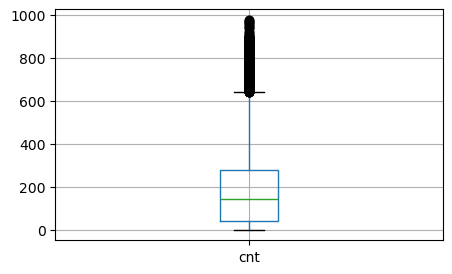

In [264]:
plt.figure(figsize=(5, 3))
hour_df.boxplot(column=['cnt'])
plt.show()

**Insight:**

Karena pada visualisasi dan analisis lanjut saya akan memanfaatkan nilai `cnt`, saya mencoba mengecek apakah terdapat outliers pada data tersebut dan pada boxplot ditunjukkan adanya outliers.

In [265]:
q25, q75 = np.percentile(hour_df['cnt'], 25), np.percentile(hour_df['cnt'], 75)

IQR = q75 - q25
max_value = q75 + (IQR * 1.5)
min_value = q25 - (IQR * 1.5)

outliers = hour_df[(hour_df['cnt'] < min_value) | (hour_df['cnt'] > max_value)]

print("Jumlah outliers: ", outliers.shape[0])
print("Persentase outliers: ", round(outliers.shape[0] / hour_df.shape[0] * 100, 2), "%")

outliers.head()

Jumlah outliers:  505
Persentase outliers:  2.91 %


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734


**Insight:**

1. Outliers berjumlah **505 data** yang juga merupakan **2.91%** dari data.
2. Dikarenakan persentase ini cukup banyak dan dikhawatirkan memnpengaruhi kualitas data, saya memilih untuk tidak melakukan drop pada outliers

### Cleaning Data

C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\436215100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df['cnt'].mask(hour_df['cnt'] > max_value, max_value, axis=0, inplace=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\436215100.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '642.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df['cnt'].mask(hour_df['cnt'] > max_value, 

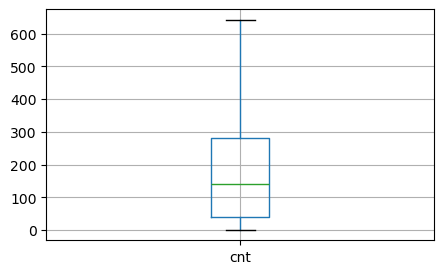

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,186.361327
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,171.931168
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,642.500000


In [266]:
hour_df['cnt'].mask(hour_df['cnt'] > max_value, max_value, axis=0, inplace=True)

plt.figure(figsize=(5, 3))
hour_df.boxplot(column=['cnt'])
plt.show()

hour_df.describe()

Untuk menangani outliers saya menggunakan metode **imputation** dengan menggunakan nilai maximum bound untuk nilai outliers. Setelah dilakukan imputation, terlihat pada boxplot sudah tidak terdapat outliers.

In [267]:
hour_df.to_csv(r"dashboard\final_cleaned_data.csv", index=False)

## Exploratory Data Analysis (EDA)

In [268]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,186.361327
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,171.931168
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,642.500000


**Insight:**
- Dari data di atas, diketahui bahwa data yang dimiliki cukup lengkap mulai dari **Januari 2011 hingga Desember 2012**
- Data jam juga lengkap yaitu pukul **00.00 hingga 23.00** sehingga dapat dilakukan analisis
- Rata-rata dari penggunaan sepeda adalah **189 kali** dengan **minimal 1 kali** dan m**aksimal 977 kali** (setelah cleaning data)
- Rata-rata temperatur lingkungan adalah bernilai **0.49** atau sekitar **20 derajat celcius**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Jam Terhadap Penyewaan Sepeda

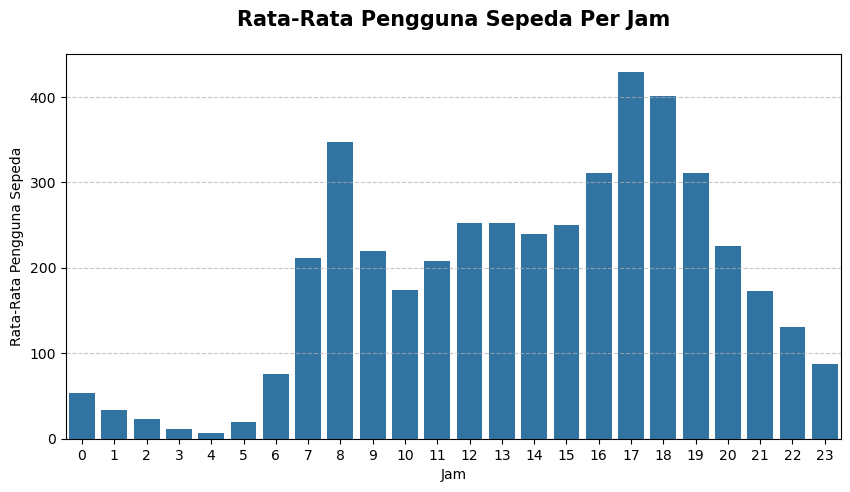

In [269]:
hourly_data = hour_df.groupby('hr').agg({
    'cnt': 'mean'
}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='hr', y='cnt', data=hourly_data)
plt.title('Rata-Rata Pengguna Sepeda Per Jam', pad=20, weight='bold', size=15)
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Pengguna Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [270]:
hourly_data.sort_values(by='cnt', ascending=False)

,hr,cnt
17,17,429.129452
18,18,401.345467
8,8,347.059835
16,16,311.286301
19,19,310.975275
13,13,252.272291
12,12,252.161401
15,15,250.376543
14,14,240.100823
20,20,226.030220


**Insight:**
- Jam dengan penyewaan tertinggi berada sekitar **pukul 17.00 dan 8.00** dengan rata-rata penyewaan 429 kali.
- Jam dengan penyewaan terendah berada sekitar **pukul 04.00** dengan rata-rata penyewaan hanya 6 kali.


### Pertanyaan 2: Pengaruh Perbedaan Musim Terhadap Penyewaan Sepeda

C:\Users\kevin\AppData\Local\Temp\ipykernel_15884\2336471364.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_data['season'].replace(i + 1, season[i], inplace=True)


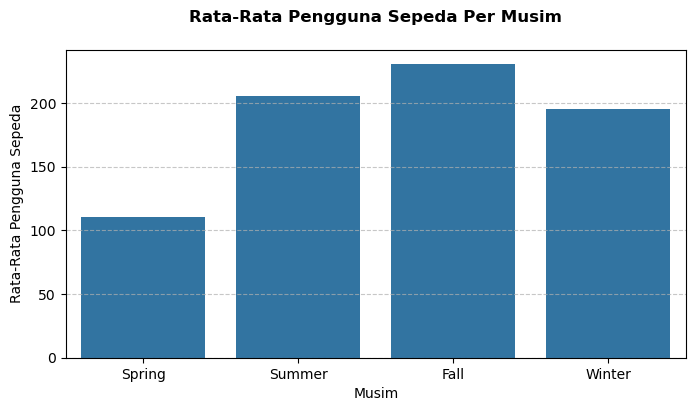

In [271]:
seasonal_data = hour_df.groupby('season').agg({
    'cnt': 'mean'
}).reset_index()

season = ['Spring', 'Summer', 'Fall', 'Winter']
for i in range(4):
    seasonal_data['season'].replace(i + 1, season[i], inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(x='season', y='cnt', data=seasonal_data)
plt.title('Rata-Rata Pengguna Sepeda Per Musim', pad=20, weight='bold', size=12)
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Pengguna Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [272]:
seasonal_data.sort_values(by='cnt', ascending=False).reset_index(drop=True)

,season,cnt
0,Fall,230.507340
1,Summer,205.489000
2,Winter,195.270794
3,Spring,110.802805


**Insight:**
- Peminjaman sepeda mengalami puncak tertinggi pada **saat musim gugur** bernilai 231 kali.
- Peminjaman sepeda mengalami nilai terendah pada **saat musim semi** bernilai 111 kali.
- Musim panas dan dingin memiliki **nilai yang tidak terlalu berbeda** bernilai 205 kali dan 195 kali secara berurutan.

## Analisis Lanjutan

### Korelasi Temperatur, Kelembaban, dan Kecepatan Angin dengan Pengguna Sepeda

<Axes: >

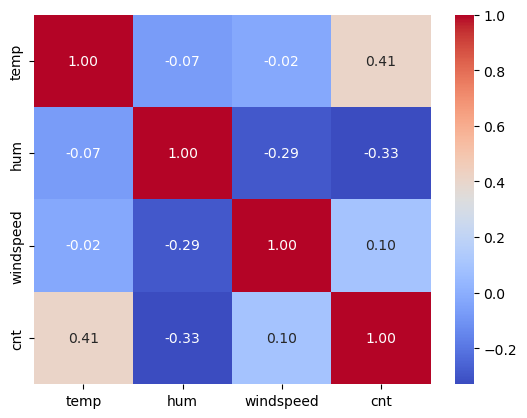

In [273]:
correlation = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

**Insight:**
- Temperatur memiliki hubungan bernilai **0.41** terhadap jumlah penyewa sepeda
- Kelembaban memiliki hubungan bernilai **-0.33** terhadap jumlah penyewa sepeda
- Kecepatan angin memiliki hubungan bernilai **0.10** terhadap jumlah penyewa sepeda

## Conclusion

- Penyewaan sepeda mengalami puncak penyewaan pada **sore hari pukul 17.00 dan pagi hari pukul 08.00**. Kondisi yang masih subuh menyebabkan penyewaan sepeda yang sangat rendah.
- Musim gugur memberikan sumbangan penyewaan sepeda yang jauh lebih besar dibandingkan dengan musim-musim lainnya.
- Penyewa sepeda cenderung **bersepeda pada temperatur lebih tinggi** dan sebaliknya **mengurangi bersepeda pada kelembaban yang tinggi**.